In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

## Загрузка и поверхностный анализ данных

In [145]:
churn_data = pd.read_csv('data/churn.csv')

In [146]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [147]:
churn_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [148]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [149]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [150]:
churn_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [151]:
churn_df = churn_data.copy()

## Ответы на вопросы

`9.1`. **Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.**

<AxesSubplot: xlabel='Exited', ylabel='count'>

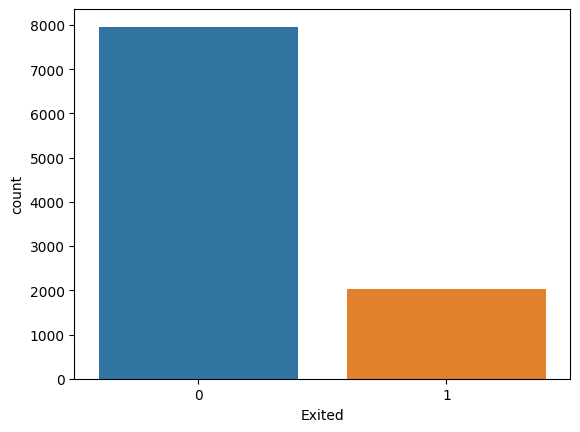

In [152]:
sns.countplot(x=churn_df['Exited'])

Согласно условию:<br>
**1** - ушедший клиент<br>
**0** - лояльный клиент<br>
<br>
Из графика видно, что ушедших клиентов в 4 раза меньше чем тех, кто остался лоялен компании.<br>
Помимо этого, т.к данная колонка является таргетом, можно заметить, что у нас существует дисбалланс таргета.
<br><br><br>

`9.2`. **Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.**

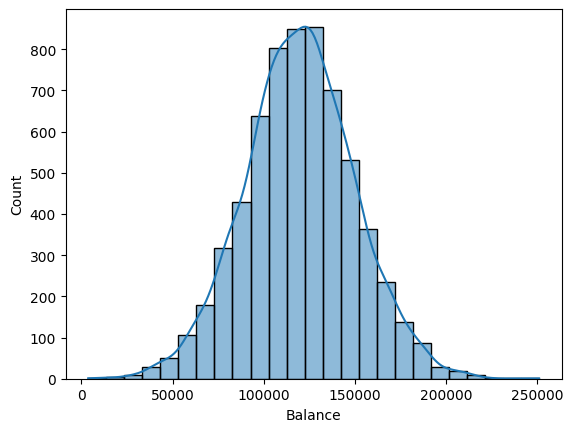

In [153]:
data = churn_df[churn_df['Balance'] > 2500]
sns.histplot(
    data=data,
    x='Balance',
    bins=25,
    kde=True
);

Распределение баланса выглядит достаточно равновесным.<br>
Мало пользователей с балансом до 35 000 и после 235 000.<br>
С другой стороны, достаточно много пользователей с балансом от 100 000 до 150 000.
<br><br><br>

`9.3`. **Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.**

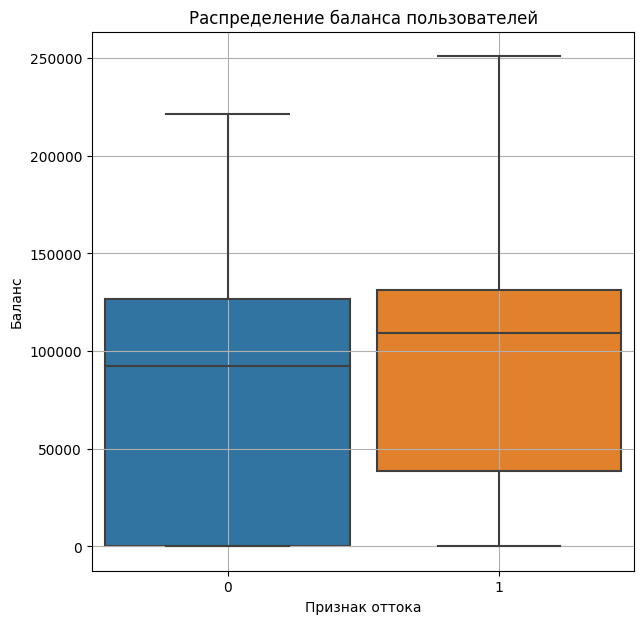

In [154]:
fig = plt.figure(figsize=(7, 7))
boxplot = sns.boxplot(
    data=churn_df,
    x='Exited',
    y='Balance',
    width=0.9
)
boxplot.set_title('Распределение баланса пользователей');
boxplot.set_xlabel('Признак оттока');
boxplot.set_ylabel('Баланс');
boxplot.grid()

Для обеих типов пользователей (лояльных и ушедших) распределение баланса различно.<br>
Лояльные пользователи имеют баланс от 0 до 125 000, ушедшие от 40 000 до 130 000.<br>
<br>
Медианный баланс лояльных пользователей составляет 90 000, ушедших пользователей - 110 000.<br>
Выбросы не наблюдаются, либо незначительны.<br>
<br>
Выглядит так, что ушедшие клиенты в основной своей массе - это клиенты с высоким балансом. Таких клиентов могло не устроить, к примеру, качество обслуживания, размер получаемых от владов процентов и многие другие причины.
<br><br><br>

`9.4`. **Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?**

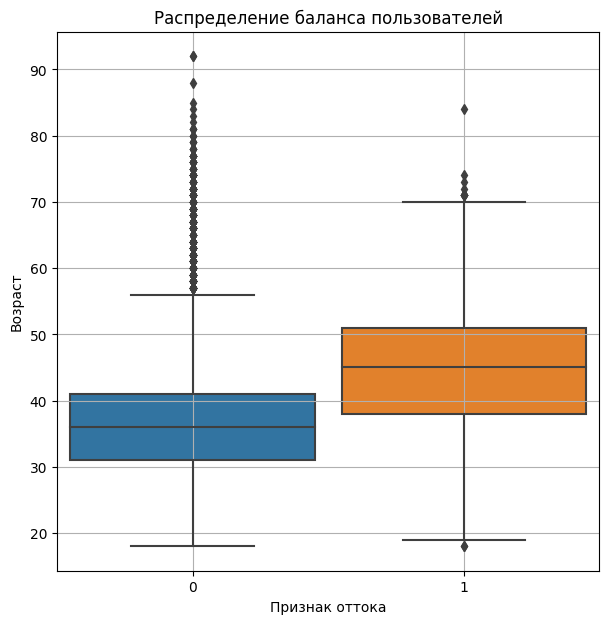

In [155]:
fig = plt.figure(figsize=(7, 7))
boxplot = sns.boxplot(
    data=churn_df,
    x='Exited',
    y='Age',
    width=0.9
)
boxplot.set_title('Распределение баланса пользователей');
boxplot.set_xlabel('Признак оттока');
boxplot.set_ylabel('Возраст');
boxplot.grid()

Для обеих типов пользователей (лояльных и ушедших) распределение возраста несколько различно:<br>
- от 31 до 41 года для лояльных
- от 39 до 51 года для ушедших

Медианный возраст лояльных пользователей - 36 лет, ушедших пользователей - 45 лет.<br>
Число потенциальных выбросов по возрасту среди лояльных пользователей существенно выше, чем среди ушедших.<br>
Банку следует обратить внимание на возрастную категорию ушедших клиентов от 39 лет до 51 года.
<br><br><br>

`9.5`. **Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.**

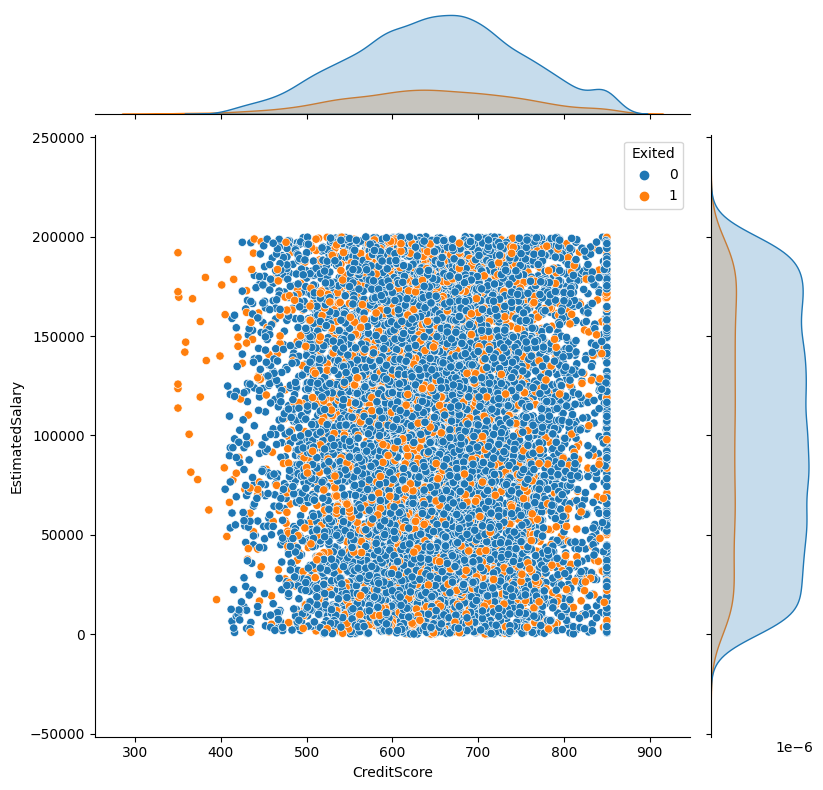

In [156]:
jointplot = sns.jointplot(
    data=churn_df, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
    height=8,
)

Какой-то существенной взаимосвязи из графика не видно. Также несколько смущает наличие предполагаемой зарплаты меньше нуля. Необходимо дополнительное исследование.
<br><br><br>

`9.6`. **Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.**

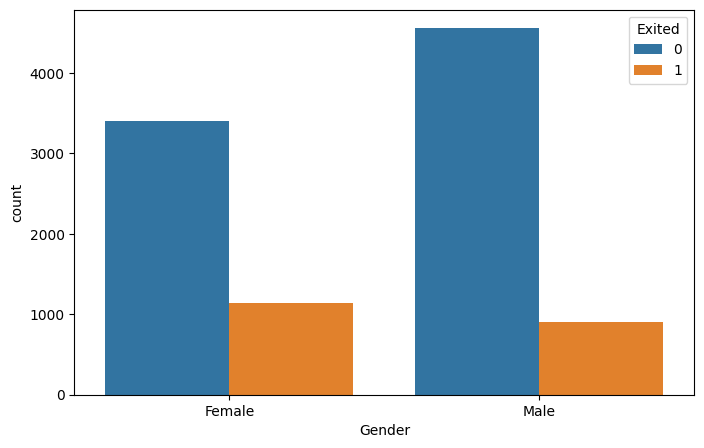

In [157]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Exited', data=churn_df)
plt.show()

Из графика видно, что женщин ушло немного больше, чем мужчин.<br>
Также можно заметить, что из группы лояльных клиентов именно мужчины более лояльны, чем женщины.
<br><br><br>

`9.7`. **Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.**

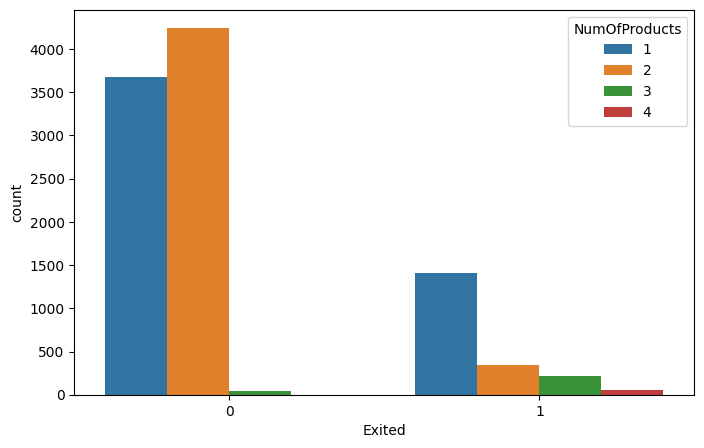

In [158]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', hue='NumOfProducts', data=churn_df)
plt.show()

Из графика прослеживается зависимость оттока клиентов и приобретенных у банка услуг.<br>
Несложно заметить, что лояльные клиенты в основной массе пользуются продуктами 1 и 2. Также есть малое количество людей, возпользовавшихся продуктом 3.<br>
<br>
Ситуация с ушедшими клиентами несколько отличается.<br>
Больше всего ушедшие клиенты пользовались продуктом 1, существенно меньше продуктами 2 и 3, и совсем немного клиентов воспользовались продуктом 4.
<br><br><br>

`9.8`. **Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?**

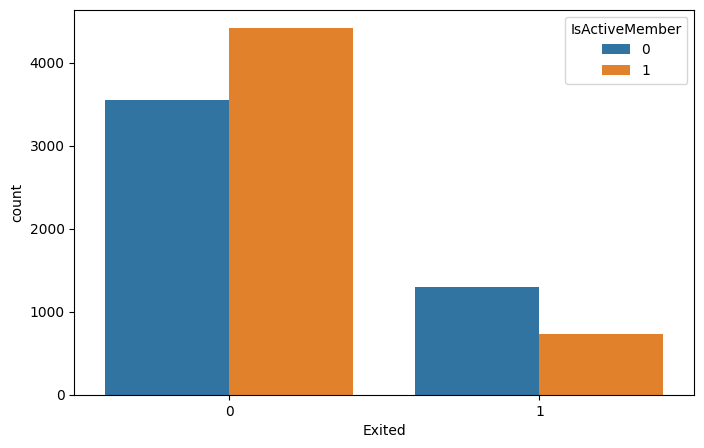

In [159]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df)
plt.show()

В данном случае вызывает вопрос, что именно подразумевается под "активным" клиентом банка. Если имеется в виду клиент, пользующийся/не пользующийся услугами банка, - тогда можно ли считать ушедших клиентов не активными? Переводятся ли они в этот статус?<br>
<br>
Не обращая внимания на возникшие выше вопросы, в целом, мы можем сделать вывод, что из ушедших клиентов активных было почти в 2 раза меньше.<br>
Ситуация с лояльными клиентами несколько отличается, активных немного больше, чем не активных.<br>
<br>
Выглядит так, что активность может иметь какое-то значение. Банку можно порекомендовать переводить клиентов в статус "активных" (что бы этот статус не значил). Если под "активным" подразумевается клиент пользующийся активно услугами банка - значит нужно развивать данные услуги, чтобы больше клиентов ими могло воспользоваться.
<br><br><br>

`9.9`. **В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.**

In [160]:
exited_all = churn_df['Exited'].sum()
choropleth_data = churn_df.groupby(
    ['Geography'], 
    as_index=False
)[['Exited']].sum()
choropleth_data['Exited'] = choropleth_data['Exited'] / exited_all * 100

fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 100], #диапазон цвета
    title='Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)
fig.show()

В Германии доля ушедших клиентов больше других стран - 39.9%. Связано это может быть, к примеру, с услугами, не пользующимися спросом, с невыгодными банковскими условиями и рядом других причин.
<br><br><br>

`9.10`. **Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.**

**Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.**

**На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.**

In [161]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [162]:
churn_df['CreditScoreCat'] = churn_df.apply(lambda x: get_credit_score_cat(x['CreditScore']), axis=1)

In [163]:
pivot = churn_df.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc='mean' # по-умолчанию работает mean, добавим чтобы показать, что мы придерживаемся заданного условия
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


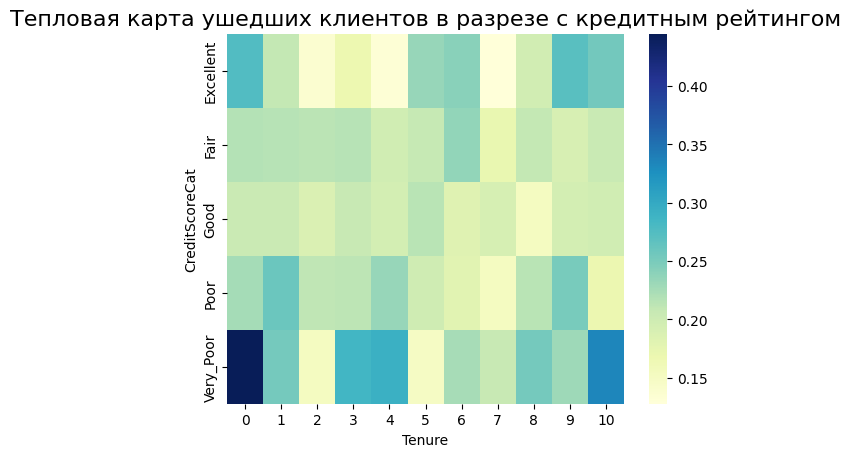

In [164]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта ушедших клиентов в разрезе с кредитным рейтингом', fontsize=16);

Согласно тепловой карте, чаще всего уходят клиенты с категорией кредитного рейтинга **Very_Poor**, имеющие взаимоотношения с банком до 1 года.<br>
Следующие после них, клиенты с категорией **Very_Poor**, имеющие взаимоотношения с банком от 10 лет.<br>
<br>
В целом, можно сделать вывод, что очень много ушедших клиентов имеют категорию кредитного рейтинга **Very_Poor**.<br>
Следующие за ними - клиенты с категорией **Poor**, после них - **Fair**.